# 2020 COVID-19 DATA VISUALIZATION

***IE - Master in Business Analytics & Big Data***

***Class: Data Visualization***

***Team E: Sydne-Aline Strasser, Julius von Selchow, William Kingwill,  Tarek ElNoury, Emily Yorke, Alain Grullon Gonzalez***

# ***Initialization***

In [1]:
# import libraries
##conda install -c conda-forge folium
##conda install -c conda-forge requests

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates #to use for date label formatting
import requests
import folium

In [2]:
#Loading the Covid19 dataset
cv_df = pd.read_csv("/Users/jvs22/Desktop/Terminal/Github/Jupyter/jupyter/Data Visualization/Assignment_3/cv_df_cleaned2.csv", parse_dates=['dateRep'])
cv_df_orig = cv_df

In [3]:
#get a first glimpse of the data to understand the columns and its content better
cv_df.head()

,Unnamed: 0,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,0,2020-08-09,8,9,2020,96,3,Afghanistan,AF,AFG,38041757.0,Asia,1.114565
1,1,2020-07-09,7,9,2020,74,2,Afghanistan,AF,AFG,38041757.0,Asia,1.048847
2,2,2020-06-09,6,9,2020,20,0,Afghanistan,AF,AFG,38041757.0,Asia,0.854324
3,3,2020-05-09,5,9,2020,16,0,Afghanistan,AF,AFG,38041757.0,Asia,1.077763
4,4,2020-04-09,4,9,2020,45,1,Afghanistan,AF,AFG,38041757.0,Asia,1.135594


# ***EDA - EXPLORATIVE DATA ANALYSIS***

In [5]:
#get the rows and columns of the dataset
cv_df.shape

(34402, 13)

In [6]:
#get a sample of 15 rows of the dataset
cv_df.sample(15)

,Unnamed: 0,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
4065,4643,2020-04-30,30,4,2020,0,0,Bhutan,BT,BTN,7.630940e+05,Asia,0.262091
30686,35281,2020-05-06,5,6,2020,323,4,South_Sudan,SS,SSD,1.106211e+07,Africa,8.840986
15997,18312,2020-04-19,19,4,2020,325,15,Indonesia,ID,IDN,2.706256e+08,Asia,1.535701
18193,20830,2020-08-19,19,8,2020,271,5,Kenya,KE,KEN,5.257397e+07,Africa,14.140078
28685,32997,2020-05-22,22,5,2020,2532,12,Saudi_Arabia,SA,SAU,3.426853e+07,Asia,91.471682
17590,20144,2020-05-13,13,5,2020,150,25,Japan,JP,JPN,1.268603e+08,Asia,1.712120
18453,21126,2020-04-24,24,4,2020,39,1,Kosovo,XK,XKX,1.798506e+06,Europe,24.575954
12035,13802,2020-04-30,30,4,2020,1607,427,France,FR,FRA,6.701288e+07,Europe,33.181679
6415,7321,2020-04-14,14,4,2020,0,0,Cape_Verde,CV,CPV,5.499360e+05,Africa,0.909197
15769,18051,2020-04-28,28,4,2020,1543,62,India,IN,IND,1.366418e+09,Asia,1.395766


In [7]:
#get a better understanding if data is incomplete, has outliers of values etc. by its description
cv_df.describe()

,Unnamed: 0,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,34402.000000,34402.000000,34402.000000,34402.0,34402.000000,34402.000000,3.440200e+04,34402.000000
mean,20702.175513,17.034998,5.271002,2020.0,645.626621,21.613714,4.338011e+07,29.296844
std,11973.808382,9.131683,1.999611,0.0,3980.745494,126.526749,1.590500e+08,71.284127
min,8.000000,1.000000,1.000000,2020.0,0.000000,0.000000,8.150000e+02,0.000000
25%,10362.250000,8.000000,4.000000,2020.0,0.000000,0.000000,1.355982e+06,0.220950
50%,20648.500000,18.000000,5.000000,2020.0,8.000000,0.000000,8.519373e+06,3.553417
75%,31119.750000,25.000000,7.000000,2020.0,136.000000,2.000000,2.916192e+07,21.234986
max,41418.000000,31.000000,8.000000,2020.0,78761.000000,4928.000000,1.433784e+09,1058.225943


In [8]:
cv_df.describe(include='all')

,Unnamed: 0,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,34402.000000,34402,34402.000000,34402.000000,34402.0,34402.000000,34402.000000,34402,34402,34402,3.440200e+04,34402,34402.000000
unique,NaN,211,NaN,NaN,NaN,NaN,NaN,208,208,208,NaN,5,NaN
top,NaN,2020-07-06 00:00:00,NaN,NaN,NaN,NaN,NaN,Japan,BE,CNG1925,NaN,Europe,NaN
freq,NaN,208,NaN,NaN,NaN,NaN,NaN,211,211,211,NaN,9896,NaN
first,NaN,2020-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-08-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,20702.175513,NaN,17.034998,5.271002,2020.0,645.626621,21.613714,NaN,NaN,NaN,4.338011e+07,NaN,29.296844
std,11973.808382,NaN,9.131683,1.999611,0.0,3980.745494,126.526749,NaN,NaN,NaN,1.590500e+08,NaN,71.284127
min,8.000000,NaN,1.000000,1.000000,2020.0,0.000000,0.000000,NaN,NaN,NaN,8.150000e+02,NaN,0.000000
25%,10362.250000,NaN,8.000000,4.000000,2020.0,0.000000,0.000000,NaN,NaN,NaN,1.355982e+06,NaN,0.220950


In [9]:
#show the data in a different layout
cv_df.sample(5).transpose()

,27216,12,1183,25629,15282
Unnamed: 0,31318,12,1350,29499,17490
dateRep,2020-08-08 00:00:00,2020-08-27 00:00:00,2020-02-04 00:00:00,2020-03-04 00:00:00,2020-08-27 00:00:00
day,8,27,2,3,27
month,8,8,4,4,8
year,2020,2020,2020,2020,2020
cases,1378,55,0,21,73
deaths,50,4,0,0,0
countriesAndTerritories,Romania,Afghanistan,Antigua_and_Barbuda,Palestine,Hungary
geoId,RO,AF,AG,PS,HU
countryterritoryCode,ROU,AFG,ATG,PSE,HUN


In [10]:
#get the top 5 largest numbers for cumulative covid19 stats
cv_df.nlargest(5, "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000")

,Unnamed: 0,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
1593,1813,2020-08-20,20,8,2020,175,1,Aruba,AW,ABW,106310.0,America,1058.225943
1592,1812,2020-08-21,21,8,2020,91,1,Aruba,AW,ABW,106310.0,America,1057.285298
1591,1811,2020-08-22,22,8,2020,77,0,Aruba,AW,ABW,106310.0,America,1004.609162
1590,1810,2020-08-23,23,8,2020,70,1,Aruba,AW,ABW,106310.0,America,964.161415
1589,1809,2020-08-24,24,8,2020,34,0,Aruba,AW,ABW,106310.0,America,945.348509


In [11]:
#get the countries with highest number of deaths in 14 days cumulative data
cv_df.nlargest(5, "deaths")

,Unnamed: 0,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
34580,39728,2020-04-16,16,4,2020,30148,4928,United_States_of_America,US,USA,329064917.0,America,128.528743
26150,30087,2020-08-14,14,8,2020,9441,3935,Peru,PE,PER,32510462.0,America,309.143561
26167,30108,2020-07-24,24,7,2020,4546,3887,Peru,PE,PER,32510462.0,America,168.093582
34578,39726,2020-04-18,18,4,2020,30833,3770,United_States_of_America,US,USA,329064917.0,America,128.910430
34572,39720,2020-04-24,24,4,2020,26543,3179,United_States_of_America,US,USA,329064917.0,America,122.510477


In [12]:
#check for missing values
cv_df.isnull().sum()

Unnamed: 0                                                    0
dateRep                                                       0
day                                                           0
month                                                         0
year                                                          0
cases                                                         0
deaths                                                        0
countriesAndTerritories                                       0
geoId                                                         0
countryterritoryCode                                          0
popData2019                                                   0
continentExp                                                  0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    0
dtype: int64

In [13]:
#get info about the schema
cv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34402 entries, 8 to 36063
Data columns (total 13 columns):
Unnamed: 0                                                    34402 non-null int64
dateRep                                                       34402 non-null datetime64[ns]
day                                                           34402 non-null int64
month                                                         34402 non-null int64
year                                                          34402 non-null int64
cases                                                         34402 non-null int64
deaths                                                        34402 non-null int64
countriesAndTerritories                                       34402 non-null object
geoId                                                         34402 non-null object
countryterritoryCode                                          34402 non-null object
popData2019                                      

In [14]:
#select a subset of the data to filter for US-only
is_US = cv_df["geoId"] == "US"
cv_df[is_US]

,Unnamed: 0,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
34459,39591,2020-08-31,31,8,2020,35581,290,United_States_of_America,US,USA,329064917.0,America,180.479282
34460,39592,2020-08-30,30,8,2020,44143,1006,United_States_of_America,US,USA,329064917.0,America,182.461566
34461,39593,2020-08-29,29,8,2020,49654,949,United_States_of_America,US,USA,329064917.0,America,183.659506
34462,39594,2020-08-28,28,8,2020,45909,1110,United_States_of_America,US,USA,329064917.0,America,188.273793
34463,39595,2020-08-27,27,8,2020,42848,1228,United_States_of_America,US,USA,329064917.0,America,189.849470
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34665,39829,2020-06-01,6,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,0.000000
34666,39830,2020-05-01,5,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,0.000000
34667,39831,2020-04-01,4,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,0.000000
34668,39832,2020-03-01,3,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,0.000000


## Potential Questions

1. Business Questions
    - On which day did the death number for each country peak?
    - How did the cases and deaths develop over time across the continents?
    - How is the number of cases connected with the number of deaths for country X over time?
    - Is the severity of the cases the same across countries? How wide is the variance of the severity?
    - Was there any forewarning before the second wave?
    - Why are there negative values for deaths and cases?
   

2. Technical Questions
    - High number of null values, remove, drop or replace with mean?
    - Do datatypes have to be transformed, in order to do a proper visualization?
    - Is feature engineering required?
    - Change the date range to only include data from 2020?
    - Should we remove countries with less than 200 days data?


# ***DATA CLEANING***

In [ ]:
cv_df_orig.isnull().sum()

In [ ]:
# sort dataset by dateRep - time descending
cv_df = cv_df.sort_values(by='dateRep', ascending=False)

In [ ]:
# for cases per 100000 fill NAs with last valid observation
cv_df[["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"]] = cv_df[["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"]].fillna(method='ffill')

In [ ]:
# Check nulls
cv_df.isnull().sum()

In [ ]:
# decide to drop all other rows with null values 
cv_df = cv_df.dropna()

In [ ]:
# Check if nulls were successfully dropped
cv_df.isnull().sum()

In [ ]:
# Can see that there are negative values that doesnt make sense. Explore this further
## Exploring "cases per 100k" column 
cv_df_orig.loc[cv_df_orig["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"] < 0, ["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"] ]

In [ ]:
#Check trend with one set of negative numbers 4250:4280
##Can see the trend - seems that values should just be positive
cv_df_orig.iloc[4250:4280, :]

In [ ]:
# Can view trend and seems like a simple mistake of wrong sign
#Decide to change negatives in cases per 100 000 column all to positive 

cv_df.iloc[:,11] = cv_df["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"].apply(abs)

In [ ]:
#Check if cleaning worked 
cv_df.iloc[:,11].min()

In [ ]:
## Exploring cases per 100000 column 

cv_df_orig.loc[cv_df_orig["cases"] < 0, ["cases"] ]

In [ ]:
# negative values are seen to be random mistakes 
# - decision made to remove any row with a negative number
#cv_df = cv_df[(cv_df[["cases","deaths"]] > 0).all(1)]
Neg_Index = cv_df[ cv_df["cases"] < 0 ].index 
cv_df.drop(Neg_Index, inplace = True)

Neg_Index = cv_df[ cv_df["deaths"] < 0 ].index 
cv_df.drop(Neg_Index, inplace = True)

In [ ]:
# Check all negative values are handled 
cv_df.describe()

In [ ]:
#get the types of each column
cv_df.dtypes

In [ ]:
#change the daterep column to type datetime
cv_df['dateRep'] = pd.to_datetime(cv_df['dateRep'])

In [ ]:
 #Check number of days for each country
print(cv_df["countriesAndTerritories"].value_counts())

In [ ]:
# if we want to remove the countries with less than x days data

#cv_test = cv_df
#cv_test = cv_test.groupby("countriesAndTerritories").filter(lambda x : len(x) > 200)
#cv_test["countriesAndTerritories"].value_counts()
#cv_test.describe()

In [ ]:
# drop every row in September
sept = cv_df[ cv_df["month"] == 9 ].index 
cv_df.drop(sept, inplace = True)

In [ ]:
# Only keep dates from jan 1st to August 31st
cv_df.sort_values("dateRep")
start_date = '01-01-2020'
end_date = '31-08-2020'
mask = (cv_df['dateRep'] > start_date) & (cv_df['dateRep'] <= end_date)
cv_df = cv_df.loc[mask]

In [ ]:
print(cv_df["dateRep"].min())
print(cv_df["dateRep"].max())

In [ ]:
cv_df.describe()

In [ ]:
#create new column "deaths per 100k" to better compare data
cv_df["deaths per 100k"] = cv_df.loc[:, "deaths"]/cv_df.loc[:,"popData2019"]*100000

In [ ]:
#create new column "cases per 100k" to better compare data
cv_df["cases per 100k"] = cv_df.loc[:, "cases"]/cv_df.loc[:,"popData2019"]*100000

In [4]:
#drop every row in September because data is incomplete for this month
sept = cv_df[ cv_df["month"] == 9 ].index 
cv_df.drop(sept, inplace = True)

# Introduction

For the Data Visulisation Assignment 3, Team E has decided to focus on the currently most discussed topic: Coronavirus (Covid-19). The dataset selected (see below) contains the latest available data, which will be analysed in the following. For the purpose of this project, we created 10 graphs which tell a complex and still developing story, however, we can derive some insights to better understand our current reality.

#### Data
The dataset contains the latest available public data on COVID-19 including a daily situation update, the epidemiological curve and the global geographical distribution (EU/EEA and the UK, worldwide).

#### Continents
Americas (North & South America), Asia, Europe, Oceania (Australia and bordering islands) & Africa

# I. Multiple Line Graph  

## ***COVID-19 Cases across the World***

This section provides an overview about the worldwide number of cases, split up into the main 5 continents. This should provide an insight on the spread of the Coronavirus throuhgout the world.

In [15]:
# grouping the dataframe by continent & month, whilst summing the values of each column
grouped_cv_df = cv_df.groupby(["continentExp", "month"]).sum()
grouped_cv_df

Unnamed: 0    day     year    cases  deaths   popData2019  \
continentExp month                                                              
Africa       1         1055177   1359   157560        0       0  8.954523e+09   
             2         1012396   1179   151500        3       0  8.610118e+09   
             3        14179589  15817  1387740     5049     164  2.154221e+10   
             4        27541976  21659  2658320    28451    1204  3.373072e+10   
             5        30518568  24411  2918900    92800    2211  3.514086e+10   
             6        29571483  22840  2834060   224380    5134  3.387035e+10   
             7        30704454  24516  2945160   445007    8423  3.521903e+10   
             8        30659256  24516  2945160   288421    8858  3.521903e+10   
America      1         2609710   2718   315120        9       0  1.906355e+10   
             2         2504942   2358   303000       75       0  1.833034e+10   
             3        12468381  15417  1393800   187583    3672  2.412360e+10   
             4        22891904  20719  2563380   946745   61940  2.635361e+10   
             5        23793446  22239  2670440  1396783   77226  2.734987e+10   
             6        22843961  20709  2571460  2108523   75197  2.632513e+10   
             7        23724173  22246  2672460  3571727   93044  2.736725e+10   
             8        23683160  22246  2672460  3550093   99368  2.736725e+10   
Asia         1        15765683  11325  1313000     9766     212  1.057341e+11   
             2        15141000   9825  1262500    63345    2288  1.016674e+11   
             3        20365506  16507  1710940    80835    3673  1.119567e+11   
             4        26569602  17725  2187660   290911    9976  1.176129e+11   
             5        28934063  19522  2345220   528710   10555  1.226356e+11   
             6        27828383  18189  2258360   982669   22209  1.180936e+11   
             7        28842742  19500  2343200  1710590   34741  1.226255e+11   
             8        28805818  19498  2343200  2454582   40163  1.226292e+11   
Europe       1        15273032  13590  1575600       15       0  1.628458e+10   
             2        14663635  11790  1515000     1131      23  1.565825e+10   
             3        24056563  22783  2411880   421690   27228  1.949806e+10   
             4        27777991  22794  2832040   725831   88488  1.987179e+10   
             5        28796283  24488  2941120   536192   35458  2.063052e+10   
             6        27697691  22794  2830020   415039   13522  1.973379e+10   
             7        28753464  24505  2941120   425988    9177  2.066643e+10   
             8        28705312  24488  2943140   691490    8831  2.068712e+10   
Oceania      1          774284    906   105040        7       0  7.796428e+08   
             2          743039    786   101000       19       0  7.496566e+08   
             3         1874484   2410   222200     5246      21  9.019036e+08   
             4         4130798   3384   420160     2379      79  1.051411e+09   
             5         4283077   3632   436320      440      15  1.091850e+09   
             6         4118110   3384   420160      673       2  1.051411e+09   
             7         4269901   3632   436320     7932      86  1.091850e+09   
             8         4263205   3632   436320     9718     367  1.091850e+09   

                    Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
continentExp month                                                              
Africa       1                                               0.000000           
             2                                               0.024232           
             3                                             513.253102           
             4                                            3066.170314           
             5                                            9933.877904           
             6                                    

In [16]:
# function to replace numerical months with character names
def month_name(multiindex):
    months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
    return (multiindex[0], months[multiindex[1]-1])

In [17]:
# applying function above onto each index of the continent and month
grouped_cv_df.index = pd.MultiIndex.from_tuples(map(month_name, grouped_cv_df.index), names=['continentExp', 'month'])
# check changes by uncommenting the next line
grouped_cv_df

Unnamed: 0    day     year    cases  deaths   popData2019  \
continentExp month                                                              
Africa       Jan       1055177   1359   157560        0       0  8.954523e+09   
             Feb       1012396   1179   151500        3       0  8.610118e+09   
             Mar      14179589  15817  1387740     5049     164  2.154221e+10   
             Apr      27541976  21659  2658320    28451    1204  3.373072e+10   
             May      30518568  24411  2918900    92800    2211  3.514086e+10   
             Jun      29571483  22840  2834060   224380    5134  3.387035e+10   
             Jul      30704454  24516  2945160   445007    8423  3.521903e+10   
             Aug      30659256  24516  2945160   288421    8858  3.521903e+10   
America      Jan       2609710   2718   315120        9       0  1.906355e+10   
             Feb       2504942   2358   303000       75       0  1.833034e+10   
             Mar      12468381  15417  1393800   187583    3672  2.412360e+10   
             Apr      22891904  20719  2563380   946745   61940  2.635361e+10   
             May      23793446  22239  2670440  1396783   77226  2.734987e+10   
             Jun      22843961  20709  2571460  2108523   75197  2.632513e+10   
             Jul      23724173  22246  2672460  3571727   93044  2.736725e+10   
             Aug      23683160  22246  2672460  3550093   99368  2.736725e+10   
Asia         Jan      15765683  11325  1313000     9766     212  1.057341e+11   
             Feb      15141000   9825  1262500    63345    2288  1.016674e+11   
             Mar      20365506  16507  1710940    80835    3673  1.119567e+11   
             Apr      26569602  17725  2187660   290911    9976  1.176129e+11   
             May      28934063  19522  2345220   528710   10555  1.226356e+11   
             Jun      27828383  18189  2258360   982669   22209  1.180936e+11   
             Jul      28842742  19500  2343200  1710590   34741  1.226255e+11   
             Aug      28805818  19498  2343200  2454582   40163  1.226292e+11   
Europe       Jan      15273032  13590  1575600       15       0  1.628458e+10   
             Feb      14663635  11790  1515000     1131      23  1.565825e+10   
             Mar      24056563  22783  2411880   421690   27228  1.949806e+10   
             Apr      27777991  22794  2832040   725831   88488  1.987179e+10   
             May      28796283  24488  2941120   536192   35458  2.063052e+10   
             Jun      27697691  22794  2830020   415039   13522  1.973379e+10   
             Jul      28753464  24505  2941120   425988    9177  2.066643e+10   
             Aug      28705312  24488  2943140   691490    8831  2.068712e+10   
Oceania      Jan        774284    906   105040        7       0  7.796428e+08   
             Feb        743039    786   101000       19       0  7.496566e+08   
             Mar       1874484   2410   222200     5246      21  9.019036e+08   
             Apr       4130798   3384   420160     2379      79  1.051411e+09   
             May       4283077   3632   436320      440      15  1.091850e+09   
             Jun       4118110   3384   420160      673       2  1.051411e+09   
             Jul       4269901   3632   436320     7932      86  1.091850e+09   
             Aug       4263205   3632   436320     9718     367  1.091850e+09   

                    Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
continentExp month                                                              
Africa       Jan                                             0.000000           
             Feb                                             0.024232           
             Mar                                           513.253102           
             Apr                                          3066.170314           
             May                                          9933.877904           
             Jun                                  

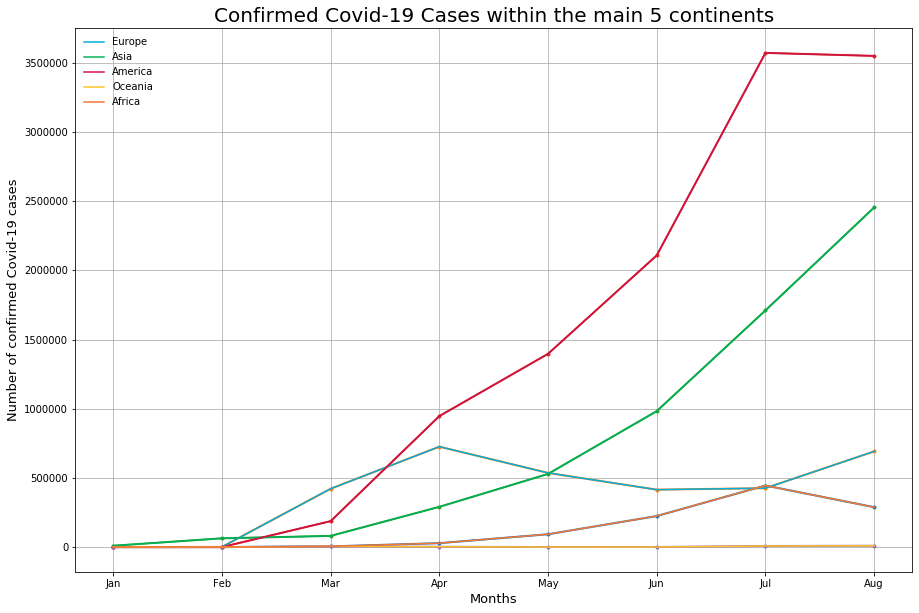

In [18]:
# Allow plots to be embedded within the notebook
%matplotlib inline
# Calls and plots the "fig" object
fig, ax = plt.subplots(figsize=(15, 10))

# Plotting the values
ax.plot(grouped_cv_df.loc['Africa'].index, grouped_cv_df.loc['Africa']['cases'], marker = '.', linewidth=2) # Plot the actual data of Africa
ax.plot(grouped_cv_df.loc['Europe'].index, grouped_cv_df.loc['Europe']['cases'], marker = '.', linewidth=2) # Plot the actual data of Europe
ax.plot(grouped_cv_df.loc['Asia'].index, grouped_cv_df.loc['Asia']['cases'], marker = '.', linewidth=2) # Plot the actual data of Asia
ax.plot(grouped_cv_df.loc['America'].index, grouped_cv_df.loc['America']['cases'], marker = '.', linewidth=2) # Plot the actual data of America
ax.plot(grouped_cv_df.loc['Oceania'].index, grouped_cv_df.loc['Oceania']['cases'], marker = '.', linewidth=2) # Plot the actual data of Oceania

# Setting up the outer plot text (titles and labels)
ax.set_xlabel('Months', fontsize=13)
ax.set_ylabel('Number of confirmed Covid-19 cases', fontsize=13)
ax.set_title('Confirmed Covid-19 Cases within the main 5 continents', fontsize=20, ha='center')

# Ploting our data, including a label for the legend
ax.plot(grouped_cv_df.loc['Europe'].index, grouped_cv_df.loc['Europe']['cases'], label='Europe', color='#00aedb')
ax.plot(grouped_cv_df.loc['Asia'].index, grouped_cv_df.loc['Asia']['cases'], label='Asia', color='#00b159')
ax.plot(grouped_cv_df.loc['America'].index, grouped_cv_df.loc['America']['cases'], label='America', color = '#d11141')
ax.plot(grouped_cv_df.loc['Oceania'].index, grouped_cv_df.loc['Oceania']['cases'], label='Oceania', color='#ffc425')
ax.plot(grouped_cv_df.loc['Africa'].index, grouped_cv_df.loc['Africa']['cases'], label='Africa', color='#f37735')       
ax.grid()

# Ploting a legend
ax.legend(frameon=False)

# So what?

### How did the Covid-19 cases develop across the continents?

As the graph clearly shows, every continent had a steep increase from March onwards. The Americas have the highest number of cases throughout the world, followed by Asia. This could indicate a correlation between the number of inhabitants and number of confirmed cases, since these two continents are by far the largest, population wise. Furthermore, the cases in Europe were increasing, but there was a slight reduction towards June/July, there was another increase in August. This could be explained by the measures taken within the European Union. The line representing Oceania lies flat at around zero, which means that the data for this continent has either not been recorded properly or is not present within the dataset used. Overall, it is evident that Covid-19 cases are increasing every month throughout the world.

# II. Bar Chart with Whiskers

## ***Global Daily Averages - Cases vs Deaths***

After looking at the continents, we visualize the global daily average of the cases and deaths in order to have a more granular overlook of the virus and human interaction throughout the months. 

In [19]:
# Separating the dataframe into month dataframes
Jan = cv_df[cv_df["month"] == 1]
Feb = cv_df[cv_df["month"] == 2]
March = cv_df[cv_df["month"] == 3]
April = cv_df[cv_df["month"] == 4]
May = cv_df[cv_df["month"] == 5]
June = cv_df[cv_df["month"] == 6]
July = cv_df[cv_df["month"] == 7]
August = cv_df[cv_df["month"] == 8]

Text(0, 2000, 'cases increasing')

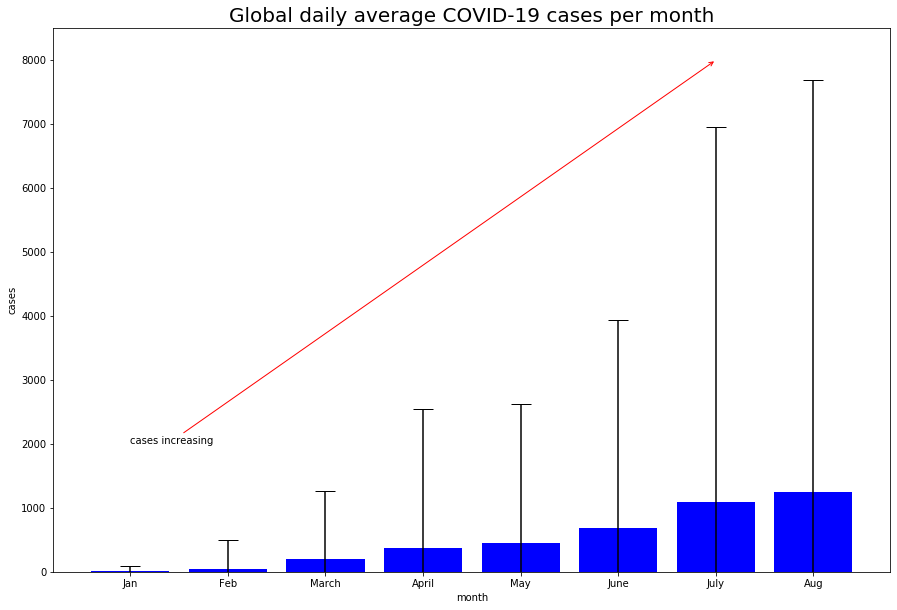

In [20]:
#set the fig and title 
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Global daily average COVID-19 cases per month', 
             fontsize=20)

# labels for x and y axis
ax.set_ylabel("cases")
ax.set_xlabel("month")

# setting a limit on the y-axis
ax.set_ylim(0, 8500)

# Box plots
ax.bar('Jan', Jan['cases'].mean(),
      yerr=Jan['cases'].std(), capsize=10, color="blue")
ax.bar('Feb', Feb['cases'].mean(),
      yerr=Feb['cases'].std(), capsize=10, color="blue")
ax.bar('March', March['cases'].mean(),
      yerr=March['cases'].std(), capsize=10, color="blue")
ax.bar('April', April['cases'].mean(),
      yerr=April['cases'].std(), capsize=10, color="blue")
ax.bar('May', May['cases'].mean(),
      yerr=May['cases'].std(), capsize=10, color="blue")
ax.bar('June', June['cases'].mean(),
      yerr=June['cases'].std(), capsize=10, color="blue")
ax.bar('July', July['cases'].mean(),
      yerr=July['cases'].std(), capsize=10, color="blue")
ax.bar('Aug', August['cases'].mean(),
      yerr=August['cases'].std(), capsize=10, color="blue")

# Annotating our box plot
ax.annotate('cases increasing',
            xy=("July", 8000), # Takes the form (x,y)
            xytext=(0, 2000),
            arrowprops={'arrowstyle':'->', 'color':'red'})

## So What?

### How are worldwide cases behaving?

At a global scale, we can see that cases of COVID-19 virus has never stopped growing since January 2020, because once Europe somewhat recovered it hit the Americas with much power, more details can be seen in more granularity in the continental visualizations. This graph is particularly interesting because of the next graph which shows the trend of deaths caused by COVID-19 relative to cases.

Text(April, 170, 'Why do deaths decrease after April?')

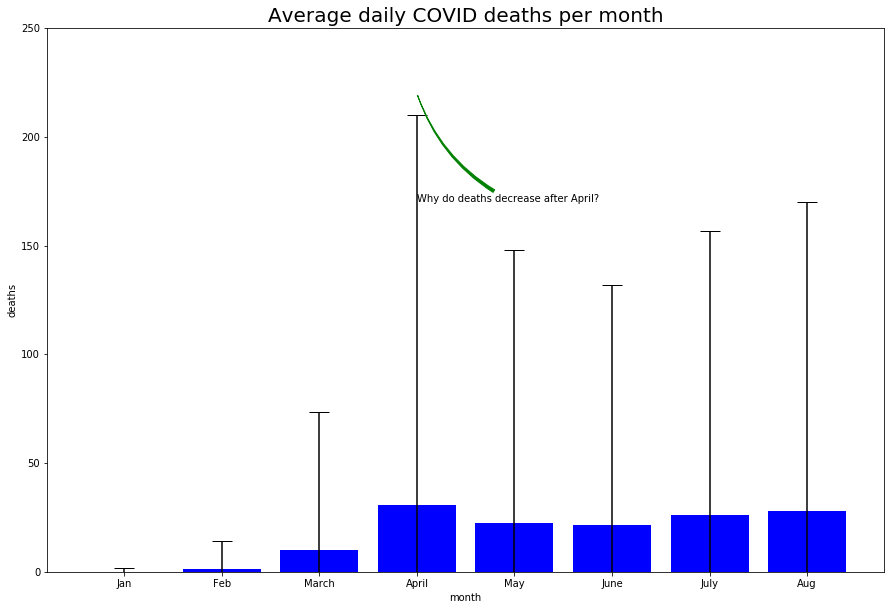

In [21]:
fig, ax2 = plt.subplots(figsize=(15, 10))
ax2.set_title('Average daily COVID deaths per month', 
             fontsize=20)
# labels
ax2.set_ylabel("deaths")
ax2.set_xlabel("month")

# setting a limit on the y-axis
ax2.set_ylim(0, 250)

# Box plots
ax2.bar('Jan', Jan['deaths'].mean(),
        yerr=Jan['deaths'].std(),capsize=10, color="blue")
ax2.bar('Feb', Feb['deaths'].mean(),
        yerr=Feb['deaths'].std(),capsize=10, color="blue")
ax2.bar('March', March['deaths'].mean(),
        yerr=March['deaths'].std(),capsize=10, color="blue")
ax2.bar('April', April['deaths'].mean(),
        yerr=April['deaths'].std(),capsize=10, color="blue")
ax2.bar('May', May['deaths'].mean(),
        yerr=May['deaths'].std(),capsize=10, color="blue")
ax2.bar('June', June['deaths'].mean(),
        yerr=June['deaths'].std(),capsize=10, color="blue")
ax2.bar('July', July['deaths'].mean(),
        yerr=July['deaths'].std(),capsize=10, color="blue")
ax2.bar('Aug', August['deaths'].mean(),
        yerr=August['deaths'].std(),capsize=10, color="blue")
# Annotating our box plot
ax2.annotate('Why do deaths decrease after April?',
            xy=("April", 220), # Takes the form (x,y)
            xytext=("April", 170),
            arrowprops=dict(arrowstyle='wedge',connectionstyle="arc3,rad=-0.2", color='green'))

## So What?

### How have global deaths behaved compared to cases? 
### How has the human race (quarantine, healthcare sector, etc.) adapted to COVID-19?
As this graph illustrates, when COVID-19 hit us with an unpredictable blow, deaths skyrocketed. However, once we knew what was coming, the world as a whole prepared for the very worst. This allowed us to survive to a great extent, as can be seen from the  visualization, taking into account the incremental increases of cases throughout the world, deaths have actually decreased. In the next visualizations, we can gain more insights about what continents fared best in this aspect.

# III. Bar Chart

## ***Development of Covid-19 deaths across Americas, Europe and Asia***

The previous chart showed the need to have clarity on each of the continents' separate impacts on the global averages. After looking at the worldwide picture, we turn now to the monthly death numbers for three major continents areas: Asia, Europe, and the Americas.


In [22]:
#Seeting up the data

#1 Grouping number of deaths by continent (Asia)
is_Asia = cv_df["continentExp"] == "Asia"
Asia = cv_df[is_Asia]
Asia2 = Asia.groupby(["month"])["deaths"].sum()
Asia2.head(5)

month
1      212
2     2288
3     3673
4     9976
5    10555
Name: deaths, dtype: int64

In [23]:
##2 Grouping number of deaths by continent (Europe)
is_Europe = cv_df["continentExp"] == "Europe"
Europe = cv_df[is_Europe]
Europe2 = Europe.groupby(["month"])["deaths"].sum()
Europe2.head(5)

month
1        0
2       23
3    27228
4    88488
5    35458
Name: deaths, dtype: int64

In [24]:
##3 Grouping number of deaths by continent (Americas)
is_America = cv_df["continentExp"] == "America"
America = cv_df[is_America]
America2 = America.groupby(["month"])["deaths"].sum()
America2.head(5)

month
1        0
2        0
3     3672
4    61940
5    77226
Name: deaths, dtype: int64

([<matplotlib.axis.XTick at 0x7fcc917a99d0>,
 <a list of 8 Text xticklabel objects>)

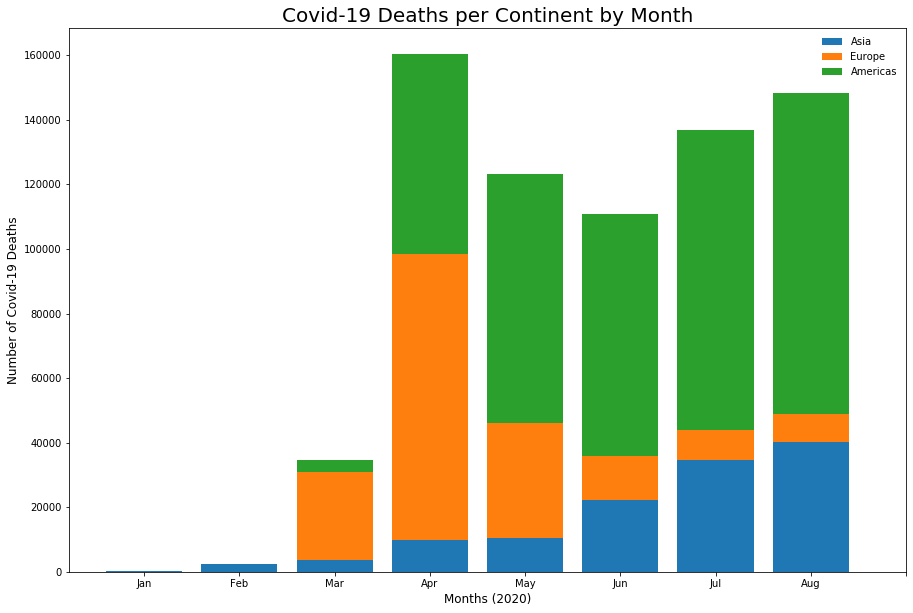

In [25]:
#4 Bar Chart (Covid-19 Deaths per month by Continent)

fig, ax = plt.subplots(figsize=(15,10))

# Adding Bar Chart Title as well as y-axis label and x-axis label
ax.set_title('Covid-19 Deaths per Continent by Month', 
             fontsize=20)
ax.set_ylabel("Number of Covid-19 Deaths", fontsize = 12)
ax.set_xlabel("Months (2020)", fontsize = 12)

# Plotting the bar chart - adding Asia Continent death numbers
ax.bar(Asia2.index, Asia2, label='Asia')

# Adding European Continent death numbers
ax.bar(Asia2.index, Europe2, 
       bottom = Asia2, label='Europe')

# Adding Americas Continent death numbers
ax.bar(Asia2.index, America2, 
       bottom = Europe2
       + Asia2,  label='Americas')

# Adding legend -top left- indicating colour representing each Continent
ax.legend(frameon=False)

# Renaming variables on x-axis to give name of month
plt.xticks([1,2,3,4,5,6,7,8,9], ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

## So What?

We can see that Covid-19 started in Asia as we can identify from the graph that there has only been death instances in Asia for January and February. Death numbers in Asia increased and peaked in August.
From the bar chart we can see that Covid-19 spread to Europe in March and it experienced a really high number of deaths in April before being able to manage number of deaths relatively compared to other continents in following months.
As for the Americas, Covid-19 death instances started in March and then death numbers have been large in the Americas from April throughout.
 


# IV. Double Axis Line Graph

## ***Covid-19 Cases vs Deaths within Europe***

We have already explored cases vs deaths on a global scale, over the course of 2020. Focusing now on the European region alone, we can investigate the relationship between cases and deaths specifically in Europe. Since Team E is currently studying within a European country, Europe was chosen to be the most suitable one to analyse more granularly. Hence, the following graph will compare the number of cases with the number of deaths within this continent.

In [26]:
ax2 = ax.twinx()

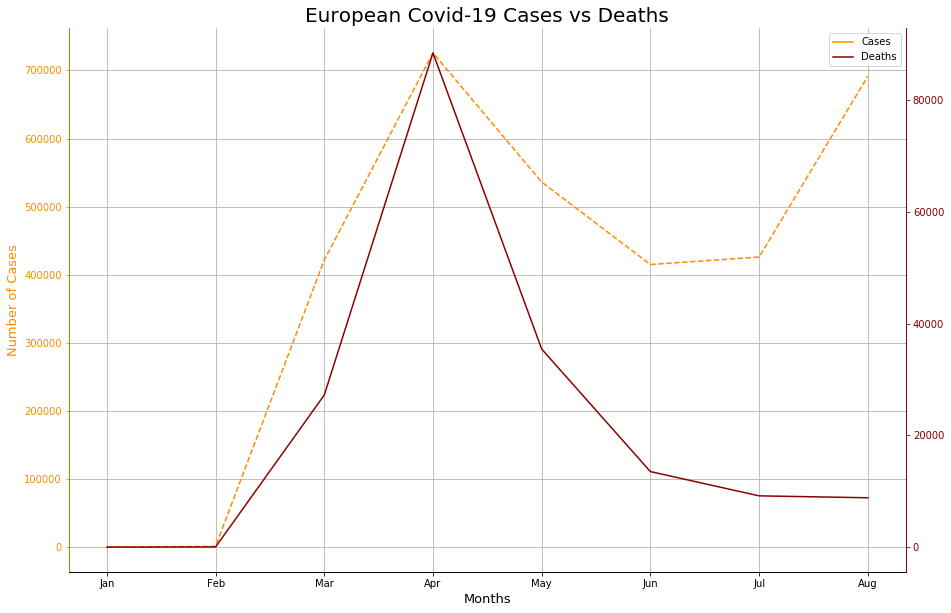

In [27]:
# Allow plots to be embedded within the notebook
%matplotlib inline
# Using different vertical (y) axes
fig, ax = plt.subplots(figsize=(15, 10))

# Setting up the outer plot text (titles and labels)
ax.set_xlabel('Months', fontsize=13)
ax.set_ylabel('Number of Cases', color='#FF8C00', fontsize=13)
ax.set_title('European Covid-19 Cases vs Deaths', fontsize=20, ha='center')
ax.grid()

# Ploting the Covid cases data
ax.plot(grouped_cv_df.loc['Europe'].index, grouped_cv_df.loc['Europe']['cases'], color='#FF8C00', linestyle='--')

# Creating a second axes & plotting the second field there
ax2 = ax.twinx() # Comment second field before uncommenting
ax2.plot(grouped_cv_df.loc['Europe'].index, grouped_cv_df.loc['Europe']['deaths'], color='#8B0000')

# Changing the color of axis values to match the color of the chart
ax.tick_params('y', colors='#FF8C00')
ax2.tick_params('y', colors='#8B0000')

# Changing the color of the spines so as to match the charts
ax2.spines['left'].set_color('#FF8C00')
ax2.spines['right'].set_color('#8B0000')

# Eliminating the top spine
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# legend
line_up, = plt.plot([], label='Cases', color='#FF8C00')
line_down, = plt.plot([], label='Deaths', color='#8B0000')
plt.legend(handles=[line_up, line_down])

# So what?

### How are the Covid-19 cases compare to the deaths within Europe?

As the twin axis-graph clearly shows, there is a relationship between the number of cases and deaths within Europe. Since, the outbreak of Covid-19 in late February/beginning of march, the number of cases and deaths was rising rapidly, reaching a peak in April. 700,000 cases were recorded that month and over 80,000 people lost their lives. Surpassing the peak, however, the numbers, both for cases and deaths, were decreasing until June/July. This again could be explained by the measures taken within the European Union (see Chart I.). Nonetheless, during the month of August, the number of cases started increasing again, however, the number of deaths continued to decrease, reaching a lower value than during march.


# V. Truncated Graph


## Comparison of cases for selected European countries

After seeing the relationship in Europe between cases and deaths, it makes sense to, again, go a level deeper. For 2020, it was during the months March through May that European countries were hit the hardest with coronavirus. As most of the countries around Spain started being effected around the same time, we can ask ourselves how Spain did compared to its neighbours Italy, Portugal and France?


In [28]:
# Create data for weekly sum cases to plot 
#Spain:
Spain_index = cv_df["countriesAndTerritories"] == "Spain" #subset just spain data 
cv_df_Spain = cv_df[Spain_index]                        
cv_df_Spain = cv_df_Spain.loc[:,['dateRep','cases']]  # format to keep just date and cases columns 
weekly_Spain = cv_df_Spain.resample('W', label='right', closed = 'right', on='dateRep').sum().reset_index().sort_values(by='dateRep') #sum cases weekly 
weekly_Spain = weekly_Spain.set_index('dateRep', drop = True) # set the date column as index 

#Italy 
Italy_index = cv_df["countriesAndTerritories"] == "Italy" #subset just Italy data 
cv_df_Italy = cv_df[Italy_index]                        
cv_df_Italy = cv_df_Italy.loc[:,['dateRep','cases']]  # format to keep just date and cases columns 
weekly_Italy = cv_df_Italy.resample('W', label='right', closed = 'right', on='dateRep').sum().reset_index().sort_values(by='dateRep') #sum cases weekly 
weekly_Italy = weekly_Italy.set_index('dateRep', drop = True) # set the date column as index 

#Portugal 
Portugal_index = cv_df["countriesAndTerritories"] == "Portugal" #subset just Portugal data 
cv_df_Portugal = cv_df[Portugal_index]                        
cv_df_Portugal = cv_df_Portugal.loc[:,['dateRep','cases']]  # format to keep just date and cases columns 
weekly_Portugal = cv_df_Portugal.resample('W', label='right', closed = 'right', on='dateRep').sum().reset_index().sort_values(by='dateRep') #sum cases weekly 
weekly_Portugal = weekly_Portugal.set_index('dateRep', drop = True) # set the date column as index 

#France  
France_index = cv_df["countriesAndTerritories"] == "France" #subset just France data 
cv_df_France = cv_df[France_index]                        
cv_df_France = cv_df_France.loc[:,['dateRep','cases']]  # format to keep just date and cases columns 
weekly_France = cv_df_France.resample('W', label='right', closed = 'right', on='dateRep').sum().reset_index().sort_values(by='dateRep') #sum cases weekly 
weekly_France = weekly_France.set_index('dateRep', drop = True) # set the date column as index

/Users/jvs22/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


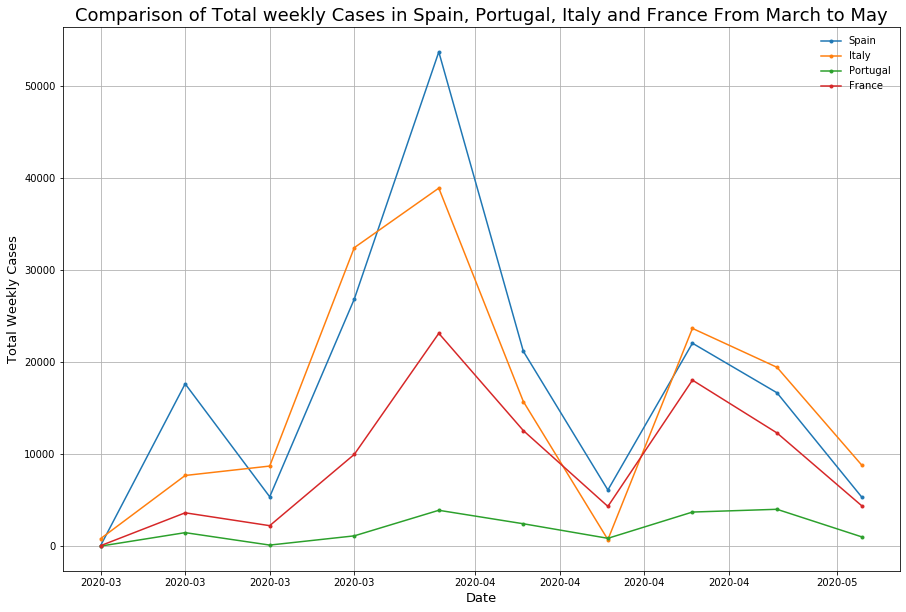

In [29]:
#Truncated Graph comparing Spain, Portugal, Italy and France cases in months May - July
#Truncate the date from 2020-03-1 to 2020-05-03
ts_MarchtoJune_S = weekly_Spain.truncate(before = "2020-03-01", after = "2020-05-03") 
ts_MarchtoJune_I = weekly_Italy.truncate(before = "2020-03-01", after = "2020-05-03")
ts_MarchtoJune_P = weekly_Portugal.truncate(before = "2020-03-01", after = "2020-05-03")
ts_MarchtoJune_F = weekly_France.truncate(before = "2020-03-01", after = "2020-05-03")

#drawing the chart
fig, ax = plt.subplots(
    figsize = (15,10)
    )

ax.set_xlabel('Date', fontsize=13)
ax.set_ylabel('Total Weekly Cases', fontsize=13)
ax.set_title('Comparison of Total weekly Cases in Spain, Portugal, Italy and France From March to May', fontsize=18)

# Plotting the ts chart
ax.plot(ts_MarchtoJune_S.index, ts_MarchtoJune_S.cases, label = "Spain", marker = '.')
ax.plot(ts_MarchtoJune_I.index, ts_MarchtoJune_I.cases, label = "Italy", marker = '.')
ax.plot(ts_MarchtoJune_P.index, ts_MarchtoJune_P.cases, label = "Portugal", marker = '.')
ax.plot(ts_MarchtoJune_F.index, ts_MarchtoJune_F.cases, label = "France", marker = '.')
# add grid
ax.grid() 

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Ploting a legend
ax.legend(frameon=False)

## So What?
It can be seen that although Spain, Italy, and France experienced the spike in coronavirus cases at the same time, Spain's rate of case increase and total cases were much greater than its neighbouring countries. Also initially, around March, Spain experienced a much higher first increase in cases. However, Portugal can be seen to have a much flatter curve and compared to its nieghbours.

### This leads us to ask:

What were the factors that let Portugal have fewer cases than its neighbouring countries?
What contributed to Spain having a much higher rate of increase and total cases than its neighbours?
What is the reason for the increase again after April?

# VI. & VII. Point Time Series + Rolling Average  

## ***Waves of Cases in Spain***

Narrowing our focus further, and becoming increasingly relevant to our lives as students studying at IE, we turn to the patterns of cases in Spain, from the beginning (i.e. January) to the present day. In case looking at daily reported cases be misleading, we include a rolling average graph that replaces each point with an average of the 14 days around each day. 

In [30]:
### G R A P H *4* - Set-up in 3 steps

# 3 Steps = (1) Making weekOfYear var, making new dataframes (2) for Spain and (3) sorted by dateRep

#(1) Get week from dateRep
from datetime import date
cv_df["weekOfYear"] = cv_df["dateRep"].dt.week

#(2) Set index to select Spain as country
is_ES = cv_df["geoId"] == "ES"
cv_ES = cv_df[is_ES]

#(3) Sorted by dateRep
cv_df.nlargest(5, 'cases')
cv_ES_sorted = cv_ES.sort_values(by='dateRep')


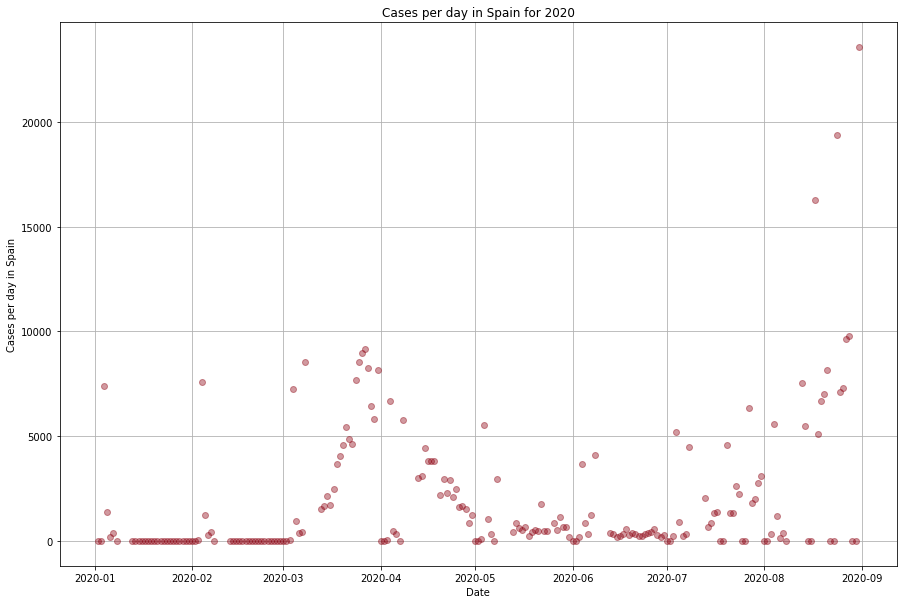

In [35]:
### G R A P H *4*

# Drawing our ts chart
fig, ax = plt.subplots(
    figsize = (15, 10),
    )

# Ploting the ts chart
ax.set_xlabel('Date')
ax.set_ylabel('Cases per day in Spain')
ax.set_title('Cases per day in Spain for 2020')
ax.grid(True)

ax.plot(cv_ES_sorted['dateRep'], cv_ES_sorted['cases'],
        marker='o',
        alpha=.4,
        linestyle='None',
        color='xkcd:crimson')

# So What?

The first plot here is indeed misleading in that it hides the fact that Spain does not report cases on weekends. It makes it seem that the periods of days without cases are longer than they actually are. 

One option could have been to remove those values, however, it still would have had a misleading effect on the way the graph in viewed, either leaving gaps where data should be or ignoring those days, which would skew the power of comparing distances (i.e. time betwen waves) in inferrring any time-based trend line through the daily points.

In [32]:
### G R A P H *5* - Set-up. Cleaner way to isolate Spain, and this only selects the relevant columns.

Spain_index = cv_df["countriesAndTerritories"] == "Spain"
cv_df_Spain = cv_df[Spain_index]
cv_df_Spain = cv_df_Spain.loc[:,['dateRep','cases']].sort_values(by='dateRep', ascending=True)

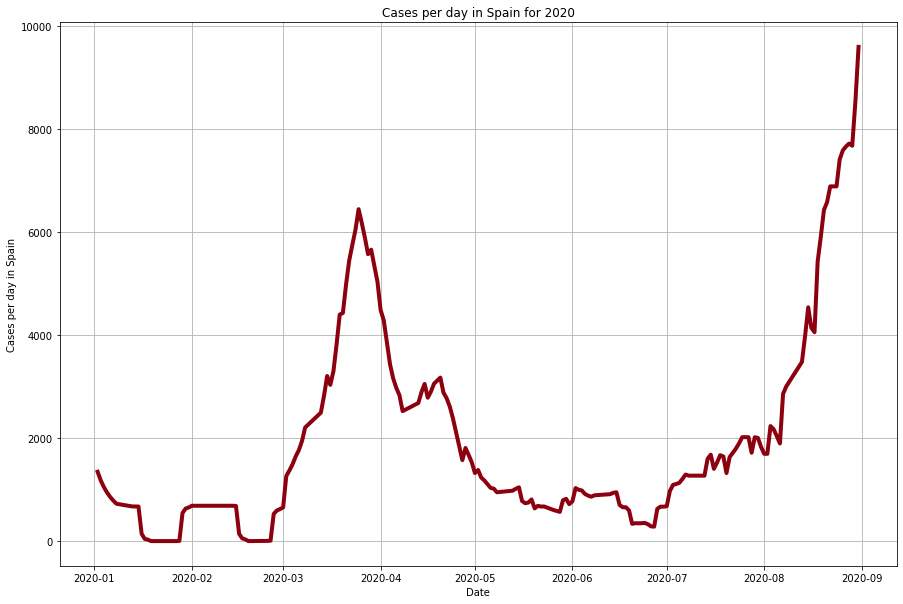

In [34]:
### G R A P H *5*

# Ensures data sorted correctly before being used in the graph
cv_df_Spain = cv_df_Spain.sort_values(by='dateRep')
cv_df_Spain.head(10)

# Making use of 'Rolling Windows' to smooth the data
cv_df_Spain_roll = cv_df_Spain.rolling(window=14, 
                           center=True, 
                           min_periods=5).mean()

# Drawing our ts chart
fig, ax = plt.subplots(
    figsize = (15, 10)
    )

# Ploting the ts chart
ax.plot(cv_df_Spain.dateRep, cv_df_Spain_roll.cases,
       color='xkcd:crimson',
       linewidth=4)
ax.set_xlabel('Date')
ax.set_ylabel('Cases per day in Spain')
ax.set_title('Cases per day in Spain for 2020')
ax.grid(True)

## So What?

The second plot is much clearer, and honest, to the short-term trends and levels of cases over time. Also, considering the reporting delays frequently experienced in Spanish Covid-19 reporting, this rolling average provides a more useful picture of the Covid-19 cases situation in Spain for each point in time. 

***Questions that might be answered:***
- Where is Spain now compared to its worst (peak) during the first wave?
- Is the rate of case increase that we are experiencing now similar, better, or worse than the first wave?
- How long was the "lull" or valley between peaks of cases in Spain?

#  VIII. & IX. Facet Line Graph

***Prepare data to plot a Facet Line Graph in suplots to compare deaths and cases for Spain, grouped by month***

As you may have guessed, we will finally turn to a case vs death comparison, specifically for Spain.

In [36]:
#set index to select Spain as country and apply it to the dataset, continue with new dataset cv_ES
is_ES = cv_df["geoId"] == "ES"
cv_ES = cv_df[is_ES]

#subset indexed dataset to new datasets only including the death numbers for Spain, as well as the maximum numbers per month
deaths_Spain = cv_ES.loc[:,"deaths"]
maxdeaths_Spain = cv_ES.loc[cv_ES.groupby(['month'])['deaths'].idxmax()]
maxdeaths_Spain_df = maxdeaths_Spain["deaths"]

#check if everything was applied correctly
maxdeaths_Spain_df.head(5)

30929      0
30904      0
30878    838
30874    950
30834    688
Name: deaths, dtype: int64

In [37]:
#subset indexed dataset to a new dataset only including the case numbers for Spain, as well as the maximum numbers per month
cases_Spain = cv_ES.loc[:, "cases"]
maxcases_Spain = cv_ES.loc[cv_ES.groupby(['month'])['cases'].idxmax()]
maxcases_Spain_df = maxcases_Spain["cases"]

#check if everything was applied correctly
maxcases_Spain_df.head(5)

30929       0
30904      19
30881    9181
30875    7583
30834    1787
Name: cases, dtype: int64

In [38]:
#subset dataset to only get the months column to correctly plot the x-axis in the graph
month_Spain = cv_ES.loc[:, "month"]
month_Spain_df = month_Spain.drop_duplicates()

#check if everything was applied correctly
month_Spain_df = month_Spain_df.sort_values(ascending = True)
month_Spain_df

30929    1
30904    2
30877    3
30852    4
30826    5
30800    6
30773    7
30746    8
Name: month, dtype: int64

***Plotting Facet Line Graph***

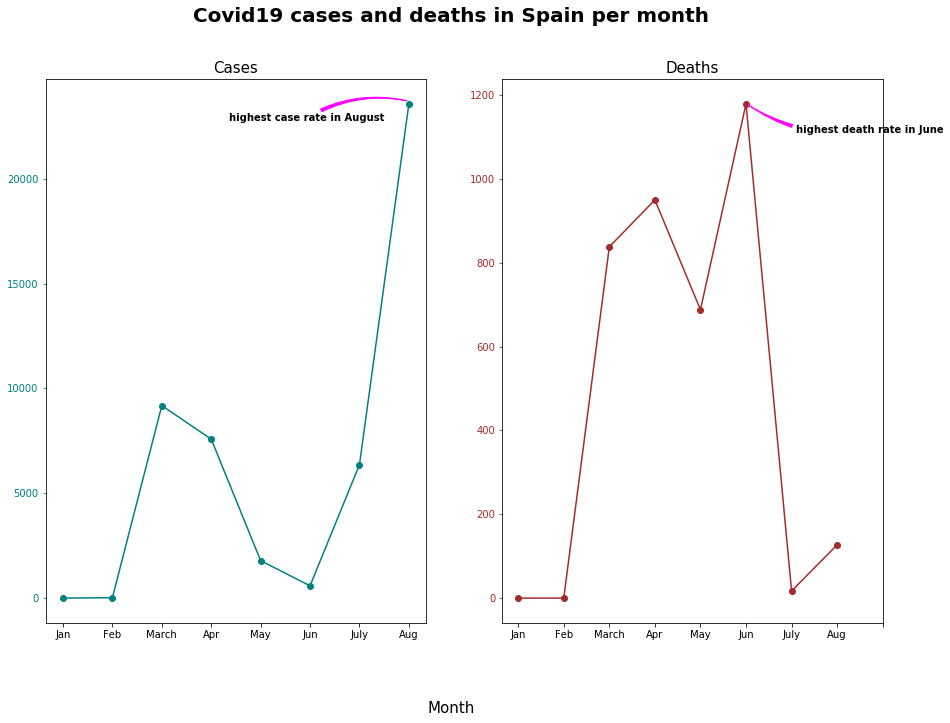

In [39]:
# Defining to have 2 charts in one figure with its size
fig, (ax1, ax2) = plt.subplots(1, 2, # rows/ columns
                               figsize=(15,10), 
                               sharex=True, # sharing x axis to be month
                               sharey=False) # not sharing y axis

# Plot the data for the number of cases and deaths in Spain per month
ax1.plot(month_Spain_df, maxcases_Spain_df, 
         color='Teal', marker = "o")
ax2.plot(month_Spain_df, maxdeaths_Spain_df, 
         color='Brown', marker = "o")

# Adding title of graph and sub
fig.suptitle('Covid19 cases and deaths in Spain per month', 
             fontsize=20, fontweight = "bold")
fig.text(0.5, 0.0,
         'Month',
         ha='center',
         fontsize=15)

# Setting subplot titles
ax1.set_title('Cases', fontsize = 15)
ax2.set_title('Deaths', fontsize = 15)

# Changing months from numbers to names
plt.xticks([1,2,3,4,5,6,7,8,9], ["Jan", "Feb", "March", "Apr", "May", "Jun", "July", "Aug"], fontsize = 10)

#insert annotation to peaks and drops
ax2.annotate("highest death rate in June", fontweight= "bold", xy=(6, 1180),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="wedge",
                            connectionstyle="arc3,rad=-0.2", color= "Magenta"))

ax1.annotate("highest case rate in August", fontweight="bold", xy=(8, 23700),  xycoords='data',
            xytext=(-180, -20), textcoords='offset points',
            arrowprops=dict(arrowstyle="wedge",
                            connectionstyle="arc3,rad=-0.2", color = "Magenta"))

#change color of axis to better differentiate
ax1.tick_params(axis='y', colors='Teal')
ax2.tick_params(axis="y", colors="Brown")


## So What?
- This graph clearly points out that Spain had its peak for cases in September and for deaths in June. 
- The lowest death rate is in July, though we can see the trend of cases picking up from July onwards (but maybe due to increasing testing intitiatives?).
- Intersting to spot is the case that between March and April deaths are increasing whereas cases are slightly declining

**Questions this graph could answer**
1. What development for cases and death did Spain face since the beginning of the Pandemic?
2. What month did Spain have the lowest/highest number both for cases and deaths?
3. Is there a trend, like "the higher the cases the higher the deaths"? Or can we see a time lag in this development?

# Current Situation
This heat map shows the current situation globaly of COVID-19 confirmed cases. As it can be seen many parts of the world are still struggling with containing this virus. With North America haveing the highest number of confirmed cases.



In [40]:
#Creating a base map to layer over 
m2 = folium.Map()

#Using an API from the virus tracker, we get the data for on current covid cases worldwide 
res = requests.get('https://api.thevirustracker.com/free-api?countryTotals=ALL')

#We turn the data into json so that it becomes a dictionary in the Python.
covid_current = res.json()

#We take only the Country name and total cases coumns for use in the graph

df = []
for j in range(1,len(covid_current['countryitems'][0])):
    df.append([covid_current['countryitems'][0]['{}'.format(j)]  ['title'],
         covid_current['countryitems'][0]['{}'.format(j)]['total_cases']])
df_covid = pd.DataFrame(df, columns = ['Country', 'Total Case'])

#Use github source to map all the countries in the world onto the map
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

#Change Countries with different nameing so that the names are the same for mapping


df_covid.replace('USA', "United States of America", inplace = True)
df_covid.replace('Tanzania', "United Republic of Tanzania", inplace = True)
df_covid.replace('Democratic Republic of Congo', "Democratic Republic of the Congo", inplace = True)
df_covid.replace('Congo', "Republic of the Congo", inplace = True)
df_covid.replace('Lao', "Laos", inplace = True)
df_covid.replace('Syrian Arab Republic', "Syria", inplace = True)
df_covid.replace('Serbia', "Republic of Serbia", inplace = True)
df_covid.replace('Czechia', "Czech Republic", inplace = True)
df_covid.replace('UAE', "United Arab Emirates", inplace = True)

#Adding the Choropleth layer onto our base map
folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=country_shapes,
    name='choropleth COVID-19',
    data=df_covid,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['Country', 'Total Case'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    nan_fill_color='white'
).add_to(m2)
m2


##  X. Scatterplot (Optional extra graph)

We investigate the global data once more to see if there is a correlation between cases and deaths, looking at daily data worldwide

[Text(0, 0, '-10000.0'),
 Text(0, 0, '0.0'),
 Text(0, 0, '10000.0'),
 Text(0, 0, '20000.0'),
 Text(0, 0, '30000.0'),
 Text(0, 0, '40000.0'),
 Text(0, 0, '50000.0'),
 Text(0, 0, '60000.0')]

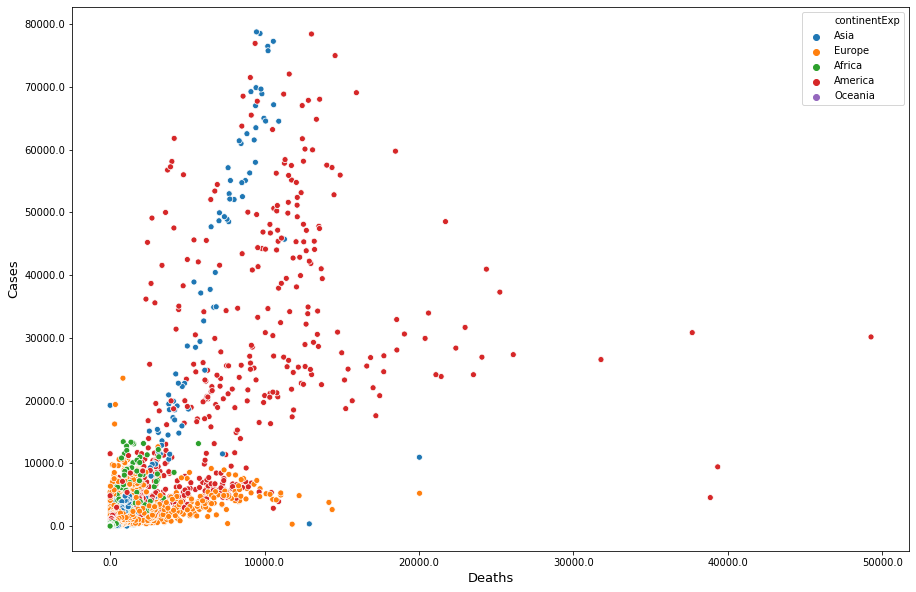

In [41]:
#scatterplot the entire dataset, grouped by continents
plt.figure(figsize=(15, 10))
s = sns.scatterplot(x="deaths", y="cases", hue = cv_df.continentExp, data = cv_df)
s.set_xlabel("Deaths", size = 13)
s.set_ylabel("Cases", size = 13)
s.set_yticklabels(s.get_yticks(), size=10)
s.set_xticklabels(s.get_yticks(), size=10)

## So What?
The Scatterplot gives us another point of view on the relationship between cases and deaths worldwide, clearly separating the continent by color. For example for Asia, we can see that some countries in Asia have very high case numbers but still average death numbers.

***Questions that might be answered:***
- Is there a correlation between death and case numbers for America/Europe/Africa etc. ?
- Which continent has a low case number but high death number and vice versa?

# Closing

 Coronavirus (Covid-19). 10 graphs were created respectively, providing a detailed insight about the current situation.

#### Overall, So What (Did We Learn)?
The dataset contains the latest available public data on COVID-19 including a daily situation update, the epidemiological curve and the global geographical distribution (EU/EEA and the UK, worldwide).

#### Thanks, Team E
